# Predicting Price of House using KNearestNeighbour Regressor

1. Use pandas to get some insights into the data
2. Show some interesting visualization of the data 
3. Manage data for training & testing
4. Finding a better value of k

# Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# Problem statement:

- To predict the house rental price in our data and the data given with sqft, floor, total floor, bedroom, living room, bathroom and price(Target variable)
- Predicting Price of House using KNearestNeighbour Regressor

# 1. Use pandas to get some insights into the data

In [2]:
data = pd.read_csv("house_rental_data.csv")
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [3]:
data.shape

(645, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [5]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [6]:
data.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [7]:
data.nunique()

Sqft           288
Floor           21
TotalFloor      25
Bedroom          7
Living.Room      5
Bathroom         6
Price          153
dtype: int64

In [8]:
#  Check for missing values

data.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [9]:
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


# 2. Show some interesting visualization of the data 

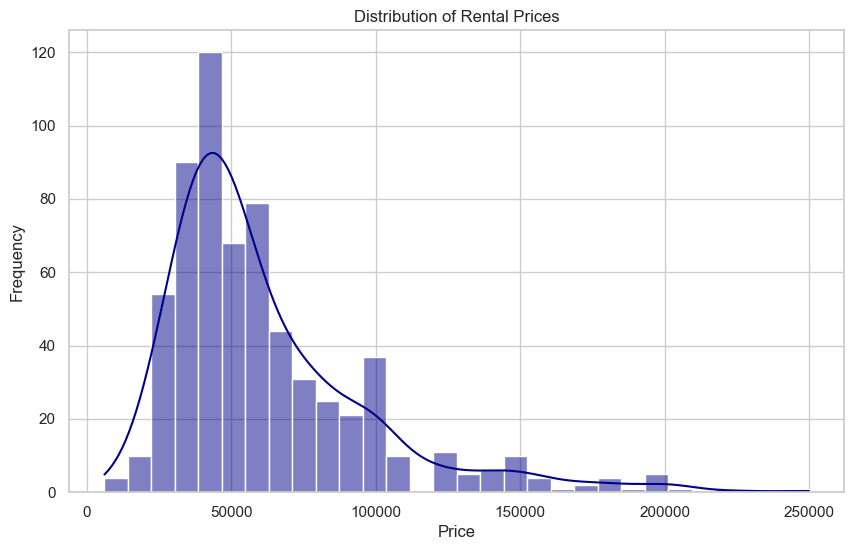

In [10]:
# Visualization 1: Distribution of Rental Prices

# Set the style for the visualizations
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True, color='darkblue')

plt.title('Distribution of Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x800 with 0 Axes>

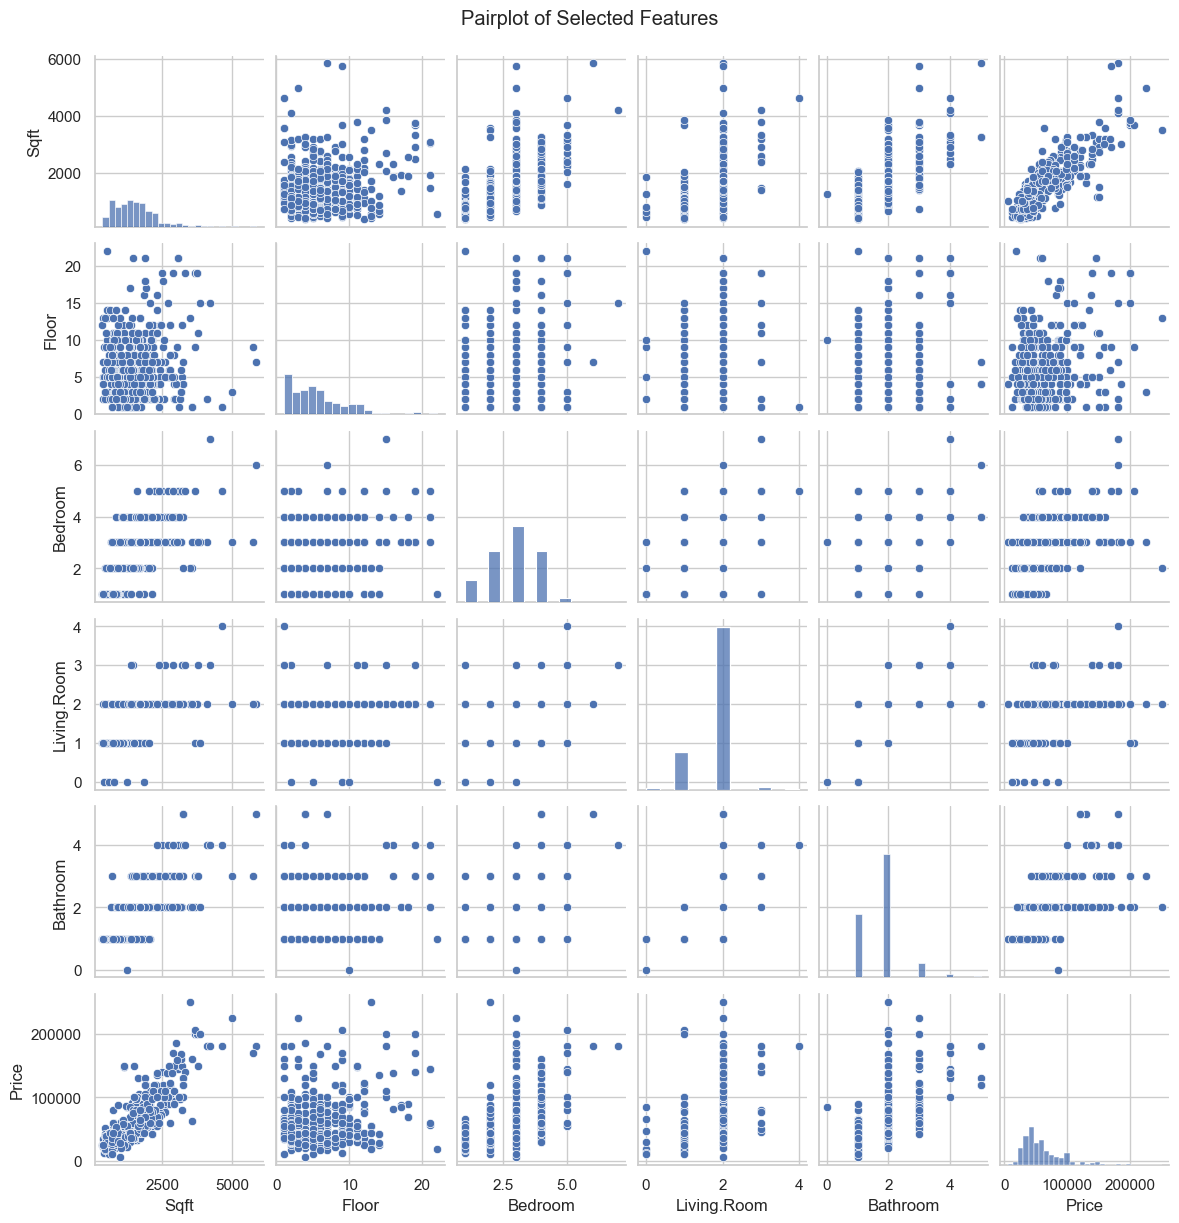

In [11]:
# Visualization 2: Pairplot of Selected Features

selected_features = ['Sqft', 'Floor', 'Bedroom', 'Living.Room', 'Bathroom', 'Price']

plt.figure(figsize=(12, 8))
sns.pairplot(data[selected_features], height=2)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [12]:
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


# 3. Manage data for training & testing

In [13]:
# Seperate X and y

X = data.drop('Price', axis = 1)
y = data['Price']

In [14]:
#  Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
X_train.shape

(516, 6)

In [16]:
X_test.shape

(129, 6)

In [17]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler()

In [18]:
X_train_scaled = ss.fit_transform(X_train)
X_train_scaled

array([[-0.06513622, -0.01427756, -0.77301614,  0.15670897, -1.86211965,
         0.26475535],
       [-0.90081595, -0.01427756, -0.77301614, -0.81752993, -1.86211965,
        -1.23649477],
       [-0.52522956, -0.5223616 , -1.16407137,  0.15670897,  0.39871268,
         0.26475535],
       ...,
       [-0.22476044, -0.5223616 ,  0.00909431,  1.13094786,  0.39871268,
         0.26475535],
       [ 1.94425102, -0.5223616 ,  0.00909431,  0.15670897,  0.39871268,
         0.26475535],
       [ 1.85035442, -1.03044565,  2.74648088,  1.13094786,  0.39871268,
         0.26475535]])

In [19]:
X_test_scaled = ss.transform(X_test)
X_test_scaled

array([[-0.57687269, -1.03044565, -0.77301614,  1.13094786,  0.39871268,
         0.26475535],
       [-0.57217786, -1.03044565, -1.35959898, -0.81752993,  0.39871268,
         0.26475535],
       [-0.10269486,  3.7963528 ,  3.13753611,  0.15670897,  0.39871268,
         0.26475535],
       [-1.02288153,  0.49380649,  0.40014953, -1.79176882, -1.86211965,
        -1.23649477],
       [ 0.4700744 , -1.03044565, -0.77301614,  1.13094786,  0.39871268,
         1.76600548],
       [ 0.22594324, -0.77640363,  0.59567715,  0.15670897,  0.39871268,
         0.26475535],
       [ 0.69542624, -0.26831958, -0.38196092,  1.13094786,  0.39871268,
         0.26475535],
       [ 0.49354855, -0.01427756, -0.77301614,  1.13094786,  0.39871268,
         0.26475535],
       [ 0.60152964, -0.26831958,  0.20462192,  0.15670897,  0.39871268,
         0.26475535],
       [-0.82100384, -1.03044565, -1.35959898, -0.81752993,  0.39871268,
        -1.23649477],
       [-0.45480711, -0.77640363, -0.77301614,  0.

# 4. Finding a better value of k ?

In [20]:
#  Apply KNN Regression on X_train and y_train

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=5)
knr

KNeighborsRegressor()

In [21]:
# Train the model
knr.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [22]:
# Make predictions on the test set

y_pred = knr.predict(X_test_scaled)
y_pred

array([ 41799.8,  55559.8,  73900. ,  32000. ,  85400. ,  62600. ,
        74799.8,  77199.6,  73000. ,  36360. ,  39777.6,  42777.6,
        41800. ,  29805.6,  35400. ,  62400. ,  44824. ,  25120. ,
        43000. ,  30060. ,  44000. ,  42177.6,  41400. ,  93599.8,
       111199.8,  44600. ,  55800. ,  29400. ,  32160. ,  45200. ,
        54520. ,  72600. ,  89399.8,  36500. ,  37000. ,  66600. ,
        74600. ,  65000. ,  70577.6,  86800. ,  57000. , 111199.8,
        78800. ,  68600. ,  44400. ,  55800. ,  37800. ,  23720. ,
        49400. ,  23720. ,  56320. ,  73000. , 142000. ,  66600. ,
        65000. ,  81200. , 102600. ,  32660. ,  76600. ,  66200. ,
        61400. , 120000. ,  85400. ,  85599.8,  77200. ,  35360. ,
        32999.8,  32400.4,  34000. ,  57824. ,  27560. ,  34306.4,
        33400.4,  30237.6,  58200. ,  25720. ,  76399.8,  54520. ,
        28120. ,  30806. ,  63377.4,  97999.8,  41800. ,  32099.8,
        45399.8,  37600. , 120000. ,  92400. ,  42624. ,  3630

In [23]:
# Evaluate the Model

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [24]:
# Calculate RMSE (Root Mean Squared Error)

rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

22720.541883686932

In [25]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.6402511382539846

In [26]:
# Fine-tune the model
# Example: Try different values of k and select the one with the lowest RMSE

for k in range(1, 21):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print(f'k={k}, RMSE={rmse}')



k=1, RMSE=25072.249342665193
k=2, RMSE=24686.32288631271
k=3, RMSE=23815.118303010615
k=4, RMSE=22797.559145407915
k=5, RMSE=22720.541883686932
k=6, RMSE=23129.202734707385
k=7, RMSE=23481.371823352525
k=8, RMSE=23232.07551190733
k=9, RMSE=23696.689386052003
k=10, RMSE=23867.927959655124
k=11, RMSE=24205.703736706324
k=12, RMSE=24464.681619863866
k=13, RMSE=24601.082790981764
k=14, RMSE=24690.612859203706
k=15, RMSE=24622.822384617633
k=16, RMSE=24712.23617141908
k=17, RMSE=24406.604783159855
k=18, RMSE=24096.493570893686
k=19, RMSE=24092.927451690997
k=20, RMSE=23881.140650622732
